<a href="https://colab.research.google.com/github/uwsd/2018-datascience-lectures/blob/master/Chapter%205.2%2C%20TF%202.0%20Quick%20Start%20Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow 2.0 Quick Start Guide
by Tony Holdroyd, March 2019, [Packtpub eBook](https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789530759)

---

In [0]:
# !pip install watermark
# !pip install tensorflow-gpu==2.0.0-alpha0

In [40]:
%load_ext watermark
%watermark -a "uwsd" -ud -p tensorflow,numpy,matplotlib -v

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
uwsd 
last updated: 2019-04-23 

CPython 3.6.7
IPython 5.5.0

tensorflow 2.0.0-alpha0
numpy 1.16.2
matplotlib 3.0.3


In [41]:
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import TensorBoard


print(f'GPU enabled: {tf.test.is_gpu_available()}')

import numpy as np
np.set_printoptions(precision=4, suppress=True)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

GPU enabled: True


In [0]:
plt.rcParams['figure.figsize'] = (15, 12)
#import IPython.display as display
#from IPython.display import HTML, SVG, YouTubeVideo
#from ipywidgets import interact

---
## Chapter 5. Unsupervised Learning Using TensorFlow 2
### An autoencoder application – denoising
#### Preprocessing the data

In [0]:
(train_x, _), (test_x, _) = fashion_mnist.load_data()

In [0]:
train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255.

In [45]:
print(train_x.shape)
print(test_x.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
train_x = np.reshape(train_x, (len(train_x), 28, 28, 1)) 
test_x = np.reshape(test_x, (len(test_x), 28, 28, 1))

In [47]:
print(train_x.shape)
print(test_x.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [48]:
np.random.normal(loc=0.0, scale=1.0, size=None)

-0.5858421642006971

In [0]:
noise = 0.5
train_x_noisy = train_x + noise * np.random.normal(loc=0.0, scale=1.0, size=train_x.shape)
test_x_noisy = test_x + noise * np.random.normal(loc=0.0, scale=1.0, size=test_x.shape)

In [0]:
train_x_noisy = np.clip(train_x_noisy, 0., 1.)
test_x_noisy = np.clip(test_x_noisy, 0., 1.)

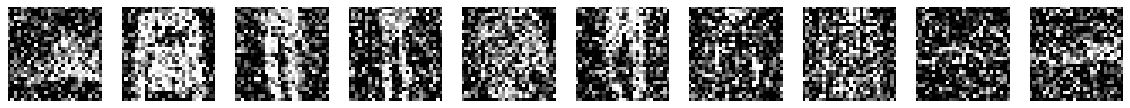

In [51]:
number_of_items = 10
plt.figure(figsize=(20, 2))

for i in range(number_of_items):
    display = plt.subplot(1, number_of_items, i + 1)
    plt.imshow(test_x_noisy[i].reshape(28, 28))
    plt.gray()
    display.get_xaxis().set_visible(False)
    display.get_yaxis().set_visible(False)

#### Creating the encoding layers

In [0]:
input_image = Input(shape=(28, 28, 1))

Signature:
```python
Conv2D(filters, kernel_size, strides=(1,1), padding='valid', data_format=None, dilation_rate=(1,1), 
       activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',
       kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
       kernel_constraint=None, bias_constraint=None,**kwargs)
```

In [53]:
im = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(input_image)
print(im.shape)

(None, 28, 28, 32)


In [54]:
im = MaxPooling2D((2, 2), padding='same')(im)
print(im.shape)
im = Conv2D(32, (3, 3), activation='relu', padding='same')(im)
print(im.shape)
encoded = MaxPooling2D((2, 2), padding='same')(im)
print(encoded.shape)
# at this point the representation is (7, 7, 32)

(None, 14, 14, 32)
(None, 14, 14, 32)
(None, 7, 7, 32)


In [55]:
im = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
print(im.shape)

(None, 7, 7, 32)


#### Creating the decoding layers
Signature:
```python
UpSampling2D(size=(2, 2), data_format=None, **kwargs)
```

In [56]:
im = UpSampling2D((2, 2))(im)
print(im.shape)
im = Conv2D(32, (3, 3), activation='relu', padding='same')(im)
print(im.shape)
im = UpSampling2D((2, 2))(im)
print(im.shape)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(im)
print(decoded.shape)

(None, 14, 14, 32)
(None, 14, 14, 32)
(None, 28, 28, 32)
(None, 28, 28, 1)


In [0]:
autoencoder = Model(inputs=input_image, outputs=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [58]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_9 (UpSampling2 (None, 14, 14, 32)        0   

In [0]:
autoencoder = Model(inputs=input_image, outputs=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

---
signature:
```python
TensorBoard(['log_dir="./logs"', 'histogram_freq=0', 'batch_size=32', 'write_graph=True', 'write_grads=False',
             'write_images=False', 'embeddings_freq=0', 'embeddings_layer_names=None', 'embeddings_metadata=None',
             'embeddings_data=None', 'update_freq="epoch"'])
```

In [0]:
tb = [TensorBoard(log_dir='./output/tmp/tb', write_graph=True)]

---
Signature:
```python
fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0,
    validation_data=None,shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0,
    steps_per_epoch=None, validation_steps=None, validation_freq=1)
```

In [61]:
epochs=150
batch_size=128

autoencoder.fit(train_x_noisy, train_x, epochs=epochs, batch_size=batch_size, shuffle=True,
                validation_data=(test_x_noisy, test_x))

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 4s 63us/sample - loss: 0.6916 - val_loss: 0.6891
Epoch 2/150
60000/60000 [==============================] - 3s 58us/sample - loss: 0.6859 - val_loss: 0.6824
Epoch 3/150
60000/60000 [==============================] - 3s 58us/sample - loss: 0.6784 - val_loss: 0.6742
Epoch 4/150
60000/60000 [==============================] - 3s 58us/sample - loss: 0.6696 - val_loss: 0.6652
Epoch 5/150
60000/60000 [==============================] - 3s 58us/sample - loss: 0.6607 - val_loss: 0.6567
Epoch 6/150
60000/60000 [==============================] - 3s 58us/sample - loss: 0.6524 - val_loss: 0.6487
Epoch 7/150
60000/60000 [==============================] - 3s 58us/sample - loss: 0.6442 - val_loss: 0.6402
Epoch 8/150
60000/60000 [==============================] - 3s 58us/sample - loss: 0.6349 - val_loss: 0.6301
Epoch 9/150
60000/60000 [==============================] - 4s 59us/sample - loss: 0.62

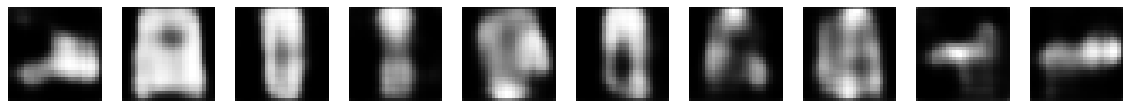

In [62]:
decoded_images = autoencoder.predict(test_x_noisy)
number_of_items = 10
plt.figure(figsize=(20, 2))
for item in range(number_of_items):
    display = plt.subplot(1, number_of_items,item+1)
    im = decoded_images[item].reshape(28, 28)
    plt.imshow(im, cmap="gray")
    display.get_xaxis().set_visible(False)
    display.get_yaxis().set_visible(False)